# KIVA dataset

This dataset was taken from Kaggle, it represents the basic info about loans on Kiva.org. Kiva.org is an online crowdfunding platform dedicated to extend financial services to poor people around the World.

__How Kiva works?__<br>
<hr>
The lending process by Kiva is simple, following just few steps:<br>

1. The borrower mets with a Field Partner of Kiva and requests a loan;

2. The Field Partner disburses a loan to the borrower;

3. The Field Partner uploads the loan request to Kiva. The request is reviewed by a team of volunteer editors and translators and then published on Kiva.org;

4. Kiva lenders found the loan request, and Kiva sends the loan to the Field Partner;

5. The borrower makes repayments and the Field Partner send funds owed to Kiva. Kiva repays lenders;

6. The lenders can make another loan, donate to Kiva or withdraw their money to their PayPal account. 70% of the lenders choose to fund another loan.

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import re
from os import walk
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen  # or: requests.get(url).content
import warnings
warnings.filterwarnings('ignore')

In [23]:
# matplotlib customization
large = 22
med = 16
small = 13
params = {
          'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 9),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 3.0,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large
            }
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
%matplotlib inline
# pandas costomization
pd.set_option('display.max_columns', None)

In [3]:
# yandex-disk download data
request = urlopen("https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/94CoEoFXZJxT8g")
kiva_zip = ZipFile(BytesIO(request.read()))
# list of filenames
file_names = list([x.filename for x in kiva_zip.infolist()])
file_names

['kiva_loans.csv',
 'kiva_mpi_region_locations.csv',
 'loan_theme_ids.csv',
 'loan_themes_by_region.csv']

In [4]:
# create dataframes
kiva_loans = pd.read_csv(kiva_zip.open(file_names[0]))
kiva_mpi = pd.read_csv(kiva_zip.open(file_names[1]))
loan_theme_ids = pd.read_csv(kiva_zip.open(file_names[2]))
loan_themes_by_region = pd.read_csv(kiva_zip.open(file_names[3]))

In [5]:
# function using to transform colnames

def transform_colnames(colname):
    if colname.isupper():
        return colname.lower()
    elif colname.islower():
        return colname
    else:
        re1 = '[A-z][a-z]+'
        re2 = '[A-Z]+'
        col_list = re.compile("(%s|%s)" % (re1, re2)).findall(colname)
        colname = ''
        for _ in col_list:
            colname = (colname + _ + '_').lower()
        return colname[:-1]
        
# function to get basic info about data

def get_info(df):
    info_df = pd.DataFrame()
    info_df['col_name'] = df.columns.to_list()
    info_df['dtype'] = df.dtypes.to_list()
    info_df['missing_values'] = df.isna().sum().to_list()
    info_df['unique_vals'] = df.nunique().to_list()
    info_df['total_vals'] = df.shape[0]
    return info_df

## get a closer look

### kiva_loans

In [6]:
# apply preparation-functions to dataframes

kiva_loans.columns = list(map(transform_colnames, kiva_loans.columns))
kiva_loans_info = get_info(kiva_loans)
kiva_loans_info

,col_name,dtype,missing_values,unique_vals,total_vals
0,id,int64,0,671205,671205
1,funded_amount,float64,0,610,671205
2,loan_amount,float64,0,479,671205
3,activity,object,0,163,671205
4,sector,object,0,15,671205
5,use,object,4232,424912,671205
6,country_code,object,8,86,671205
7,country,object,0,87,671205
8,region,object,56800,12695,671205
9,currency,object,0,67,671205


In [7]:
kiva_loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


* __id__ - is the unique identifier of the loan
* __funded_amount__ - The amount disbursed by Kiva to the field agent(USD)
* __loan_amount__ - The amount disbursed by the field agent to the borrower(USD)
* __activity__ - More granular category
* __sector__ - High level category
* __use__ - Exact usage of loan amount
* __country_code__ - ISO country code of country in which loan was disbursed
* __country__ - Full country name of country in which loan was disbursed
* __region__ - Full region name within the country
* __currency__ - the currency of the loan
* __partner_id__ - the unique identifier of the partner organization
* __posted_time__ - The time at which the loan is posted on Kiva by the field agent
* __disbursed_time__ - The time at which the loan is disbursed by the field agent to the borrower
* __funded_time__ - The time at which the loan posted to Kiva gets funded by lenders completely
* __term_in_month__ - The duration for which the loan was disbursed in months
* __lender_count__ - The total number of lenders that contributed to this loan
* __tags__ - different tags
* __borrower_genders__ - Comma separated M,F letters, where each instance represents a single male/female in the group
* __repayment_interval__ - is the categorical data about the pattern of repayments by borrowers

### kiva_mpi

mpi - multidemensional poverty index

In [8]:
kiva_mpi.columns = list(map(transform_colnames, kiva_mpi.columns))
get_info(kiva_mpi)

,col_name,dtype,missing_values,unique_vals,total_vals
0,location_name,object,1788,984,2772
1,iso,object,1764,102,2772
2,country,object,1764,102,2772
3,region,object,1788,928,2772
4,world_region,object,1764,6,2772
5,mpi,float64,1788,452,2772
6,geo,object,0,881,2772
7,lat,float64,1880,880,2772
8,lon,float64,1880,787,2772


In [9]:
kiva_mpi.head(2)

,location_name,iso,country,region,world_region,mpi,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


### loan_theme_ids

In [10]:
loan_theme_ids.columns = list(map(transform_colnames, loan_theme_ids.columns))
get_info(loan_theme_ids)

,col_name,dtype,missing_values,unique_vals,total_vals
0,id,int64,0,779092,779092
1,loan_theme_id,object,14813,956,779092
2,loan_theme_type,object,14813,203,779092
3,partner_id,float64,14813,384,779092


In [11]:
loan_theme_ids.head(2)

,id,loan_theme_id,loan_theme_type,partner_id
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0


### loan_themes_by_region

In [12]:
loan_themes_by_region.columns = list(map(transform_colnames, loan_themes_by_region.columns))
get_info(loan_themes_by_region)

,col_name,dtype,missing_values,unique_vals,total_vals
0,partner_id,int64,0,302,15736
1,field_partner_name,object,0,302,15736
2,sector,object,0,11,15736
3,loan_theme_id,object,0,718,15736
4,loan_theme_type,object,0,170,15736
5,country,object,0,79,15736
6,forkiva,object,0,2,15736
7,region,object,0,9526,15736
8,geocode_old,object,14536,340,15736
9,iso,object,14,77,15736


In [13]:
loan_themes_by_region.head(2)

,partner_id,field_partner_name,sector,loan_theme_id,loan_theme_type,country,forkiva,region,geocode_old,iso,number,amount,location_name,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,1,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,58,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


## Deep sight at the data
<hr>
So, let's dig into the data. What can we check? There is two most extencive tables (kiva_loans and loan_themes_by_region). These tables contain info about the borrower, the region, amount and data of the loan, the activity sector and mpi of the region. 

In [14]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


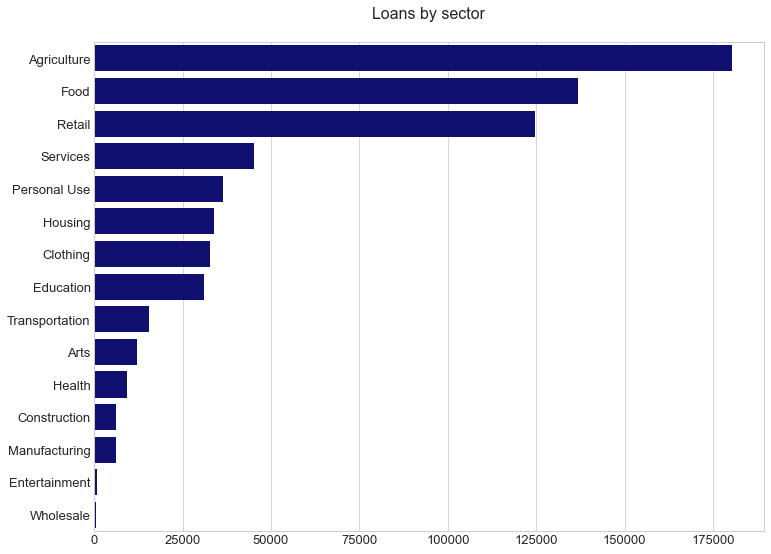

In [26]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(y=kiva_loans.sector, color='navy', order=kiva_loans.sector.value_counts().index)
plt.title('Loans by sector\n')
ax.set(xlabel=None, ylabel=None)

plt.show()
# борьба была равна, боролись два говна

In [16]:
kiva_loans_info

,col_name,dtype,missing_values,unique_vals,total_vals
0,id,int64,0,671205,671205
1,funded_amount,float64,0,610,671205
2,loan_amount,float64,0,479,671205
3,activity,object,0,163,671205
4,sector,object,0,15,671205
5,use,object,4232,424912,671205
6,country_code,object,8,86,671205
7,country,object,0,87,671205
8,region,object,56800,12695,671205
9,currency,object,0,67,671205


In [17]:
country_plot = kiva_loans.dropna(subset=['country_code', 'country'])\
                         .groupby(by=['country_code', 'country'], as_index=False)\
                         .agg({'loan_amount': 'sum', 'funded_amount': 'count'})\
                         .rename(columns={'loan_amount': 'sum_loan', 'funded_amount': 'loans_disbursed'})

country_plot

,country_code,country,sum_loan,loans_disbursed
0,AF,Afghanistan,14000.0,2
1,AL,Albania,2666500.0,1934
2,AM,Armenia,12915400.0,8631
3,AZ,Azerbaijan,2888700.0,1945
4,BF,Burkina Faso,2972700.0,2460
...,...,...,...,...
81,XK,Kosovo,1947750.0,1419
82,YE,Yemen,1879950.0,2313
83,ZA,South Africa,574025.0,378
84,ZM,Zambia,1210675.0,784


In [18]:
# data = [dict(
#         type='choropleth',
#         locations= country_plot.country,
#         locationmode='country names',
#         z=country_plot.sum_loan,
#         text=country_plot.country,
#         colorscale='sunset',
#         marker=dict(line=dict(width=0.7)),
#         colorbar=dict(
# #             autotick=False, 
#             tickprefix='', 
#             title='Total loan'),
# )]
# layout = dict(title = 'Total loan Map of the world',
#              geo = dict(
#             showframe = False,
#             showcoastlines = False,
#             projection = dict(
#                 type = 'orthographic'
#             )
#         ),)
# fig = go.Figure(data=data, layout=layout)
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=700
#     )
# fig.show()

In [19]:
# data = [dict(
#         type='choropleth',
#         locations= country_plot.country,
#         locationmode='country names',
#         z=country_plot.loans_disbursed,
#         text=country_plot.country,
#         colorscale='sunset',
#         marker=dict(line=dict(width=0.7)),
#         colorbar=dict(
# #             autotick=False, 
#             tickprefix='', 
#             title='Total loan'),
# )]
# layout = dict(title = 'Number of loans Map of the world',
#              geo = dict(
#             showframe = False,
#             showcoastlines = False,
#             projection = dict(
# #                 type = 'orthographic'
#             )
#         ),)
# fig = go.Figure(data=data, layout=layout)
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=700
#     )
# fig.show()